In [58]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
pd.options.mode.copy_on_write = True
from sklearn.metrics import confusion_matrix

In [59]:
stock_df = pd.read_csv('AAPL_UD.csv')

In [60]:
stock_df

,date,high,low,close,adj_close,volume
0,"Jul 8, 2024",227.09,227.85,223.25,227.82,227.82
1,"Jul 5, 2024",221.65,226.45,221.65,226.34,226.34
2,"Jul 3, 2024",220.00,221.55,219.03,221.55,221.55
3,"Jul 2, 2024",216.15,220.38,215.10,220.27,220.27
4,"Jul 1, 2024",212.09,217.51,211.92,216.75,216.75
...,...,...,...,...,...,...
246,"Jul 14, 2023",190.23,191.18,189.63,190.69,189.68
247,"Jul 13, 2023",190.50,191.19,189.78,190.54,189.53
248,"Jul 12, 2023",189.68,191.70,188.47,189.77,188.77
249,"Jul 11, 2023",189.16,189.30,186.60,188.08,187.09


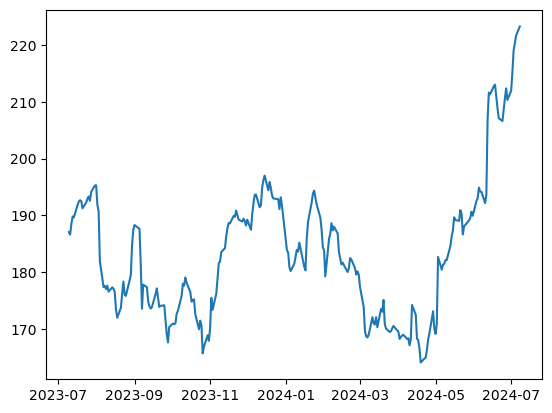

In [61]:
stock_df['date'] = pd.to_datetime(stock_df['date'])      
plt.plot(stock_df['date'],stock_df['close']) 

In [62]:
stock_df["TMRW"] = stock_df["close"].shift(-1)

In [63]:
stock_df

,date,high,low,close,adj_close,volume,TMRW
0,2024-07-08,227.09,227.85,223.25,227.82,227.82,221.65
1,2024-07-05,221.65,226.45,221.65,226.34,226.34,219.03
2,2024-07-03,220.00,221.55,219.03,221.55,221.55,215.10
3,2024-07-02,216.15,220.38,215.10,220.27,220.27,211.92
4,2024-07-01,212.09,217.51,211.92,216.75,216.75,210.30
...,...,...,...,...,...,...,...
246,2023-07-14,190.23,191.18,189.63,190.69,189.68,189.78
247,2023-07-13,190.50,191.19,189.78,190.54,189.53,188.47
248,2023-07-12,189.68,191.70,188.47,189.77,188.77,186.60
249,2023-07-11,189.16,189.30,186.60,188.08,187.09,187.04


In [64]:
stock_df["TARGET"] = (stock_df["TMRW"] > stock_df["close"]).astype(int)

In [65]:
stock_df

,date,high,low,close,adj_close,volume,TMRW,TARGET
0,2024-07-08,227.09,227.85,223.25,227.82,227.82,221.65,0
1,2024-07-05,221.65,226.45,221.65,226.34,226.34,219.03,0
2,2024-07-03,220.00,221.55,219.03,221.55,221.55,215.10,0
3,2024-07-02,216.15,220.38,215.10,220.27,220.27,211.92,0
4,2024-07-01,212.09,217.51,211.92,216.75,216.75,210.30,0
...,...,...,...,...,...,...,...,...
246,2023-07-14,190.23,191.18,189.63,190.69,189.68,189.78,1
247,2023-07-13,190.50,191.19,189.78,190.54,189.53,188.47,0
248,2023-07-12,189.68,191.70,188.47,189.77,188.77,186.60,0
249,2023-07-11,189.16,189.30,186.60,188.08,187.09,187.04,1


In [66]:
model = RandomForestClassifier(n_estimators=500, min_samples_split=500, random_state=1)

train = stock_df.iloc[:-50]
test = stock_df.iloc[-50:]

predictors = ["high", "volume", "close", "low", "adj_close"]
model.fit(train[predictors], train["TARGET"])

RandomForestClassifier(min_samples_split=500, n_estimators=500, random_state=1)

In [55]:
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)

In [56]:
print(preds.value_counts())
print(test["TARGET"].value_counts())

0    50
Name: count, dtype: int64
TARGET
1    25
0    25
Name: count, dtype: int64


In [72]:
precision = precision_score(test["TARGET"], preds, zero_division=1)
print("Precision Score:", precision)

Precision Score: 1.0


<Axes: >

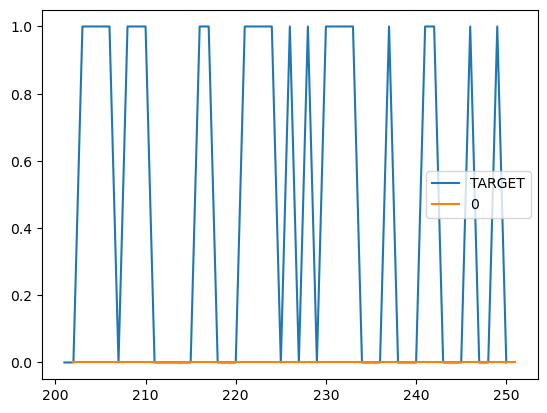

In [73]:
combined = pd.concat([test["TARGET"], preds], axis = 1)
combined.plot()